### Inpainting

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inpainting import InpaintNNF

In [24]:
def test_inpainting(src_path, mask_path, patch_w=7, max_pm_iters=5):
    src_img = cv2.imread(src_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = np.where(mask > 127, 1, 0).astype(np.uint8)

    inpainter = InpaintNNF(src_img, mask, patch_w=patch_w, max_pm_iters=max_pm_iters)
    inpainted_images = inpainter.inpaint()

    sources = []
    masks =[]

    for i in range(len(inpainter.pyramid)):
        sources.append(inpainter.pyramid[i][0])
        masks.append(inpainter.pyramid[i][1])

    return inpainted_images, sources, masks

In [19]:
def plot_images_level_wise(inpainted_images, sources, masks):
    length = len(inpainted_images)
    fig, ax = plt.subplots(length, 3, figsize=(12, 12))

    for i in range(length):
        level = length - i - 1  # Plot in reverse order
        img_shape = sources[i].shape  # Get the image shape (height, width, channels)

        # Source image
        ax[level, 0].imshow(cv2.cvtColor(sources[i], cv2.COLOR_BGR2RGB))
        ax[level, 0].set_title('Source at Level {} ({}x{})'.format(i + 1, img_shape[1], img_shape[0]))
        ax[level, 0].axis('off')

        # Mask image
        mask_to_plot = masks[i].copy()

        mask_to_plot = (mask_to_plot * 255).astype(np.uint8)
        mask_to_plot = cv2.cvtColor(mask_to_plot, cv2.COLOR_GRAY2RGB)
        
        ax[level, 1].imshow(mask_to_plot, cmap='gray')
        ax[level, 1].set_title('Mask at Level {}'.format(i + 1))
        ax[level, 1].set_xticks([])
        ax[level, 1].set_yticks([])
        

        # Inpainted image
        ax[i, 2].imshow(cv2.cvtColor(inpainted_images[i], cv2.COLOR_BGR2RGB))
        ax[i, 2].set_title('Inpainted Image at Level {}'.format(level+1))
        ax[i, 2].axis('off')

    plt.tight_layout()
    plt.show()


In [4]:
src_path = "../images/football_sky.jpg"
mask_path = "../images/football_sky_mask.jpg"
inpainted_images, sources, masks = test_inpainting(src_path, mask_path)

Level 6 done in 0.05617380142211914 seconds.
Level 5 done in 0.5968923568725586 seconds.
Level 4 done in 4.055978059768677 seconds.
Level 3 done in 16.193383932113647 seconds.
Level 2 done in 57.0004608631134 seconds.
Level 1 done in 356.82667994499207 seconds.


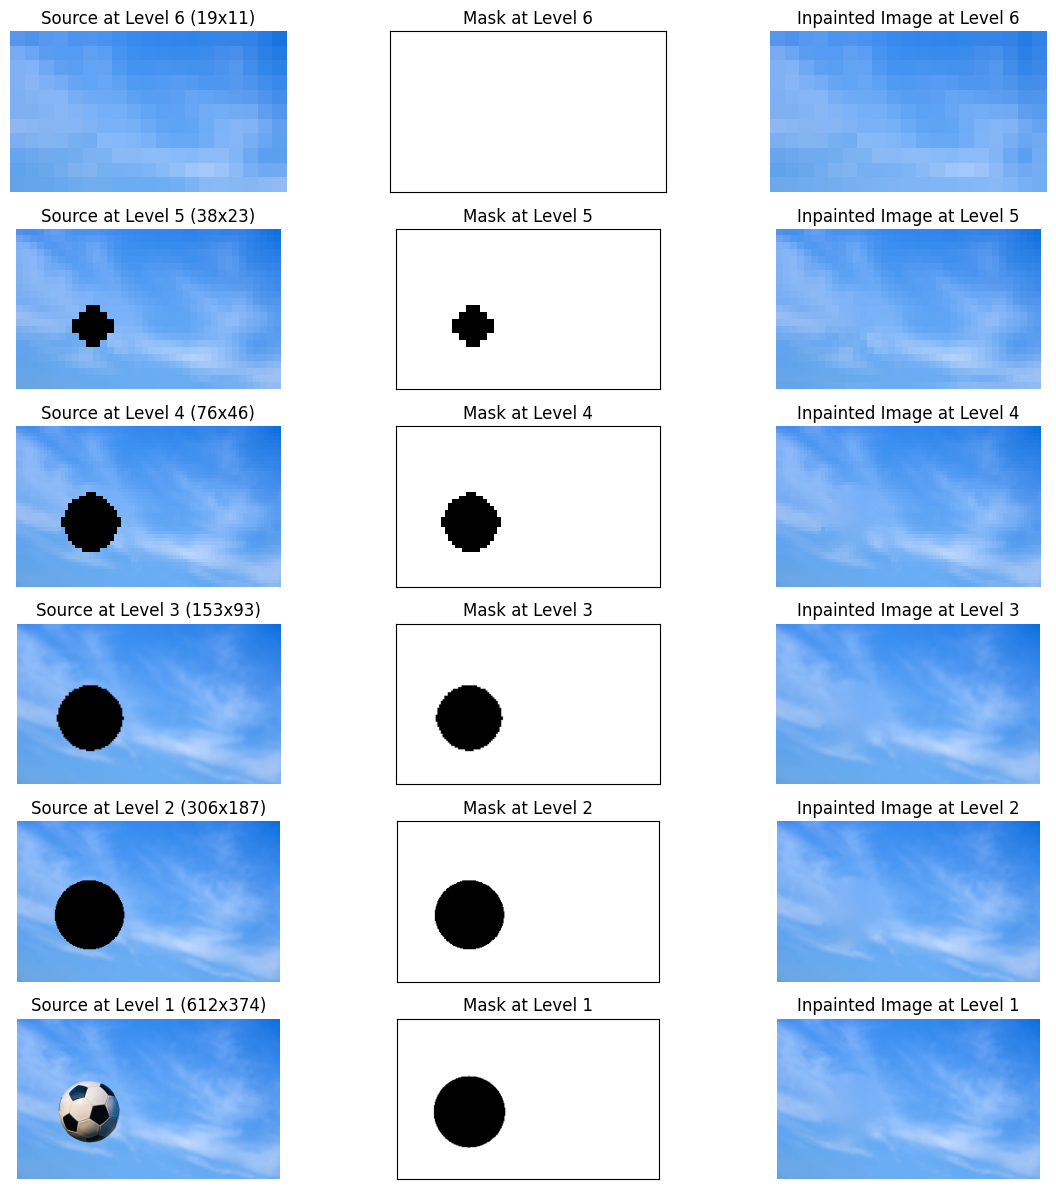

In [20]:
plot_images_level_wise(inpainted_images, sources, masks)

In [29]:
src_path = "../images/tattoo.png"
mask_path = "../images/tattoo_mask.png"
inpainted_images3, sources3, masks3 = test_inpainting(src_path, mask_path)

Level 6 done in 0.010281085968017578 seconds.
Level 5 done in 0.04307389259338379 seconds.
Level 4 done in 0.5075159072875977 seconds.
Level 3 done in 2.6892919540405273 seconds.
Level 2 done in 9.071850061416626 seconds.
Level 1 done in 35.95954418182373 seconds.


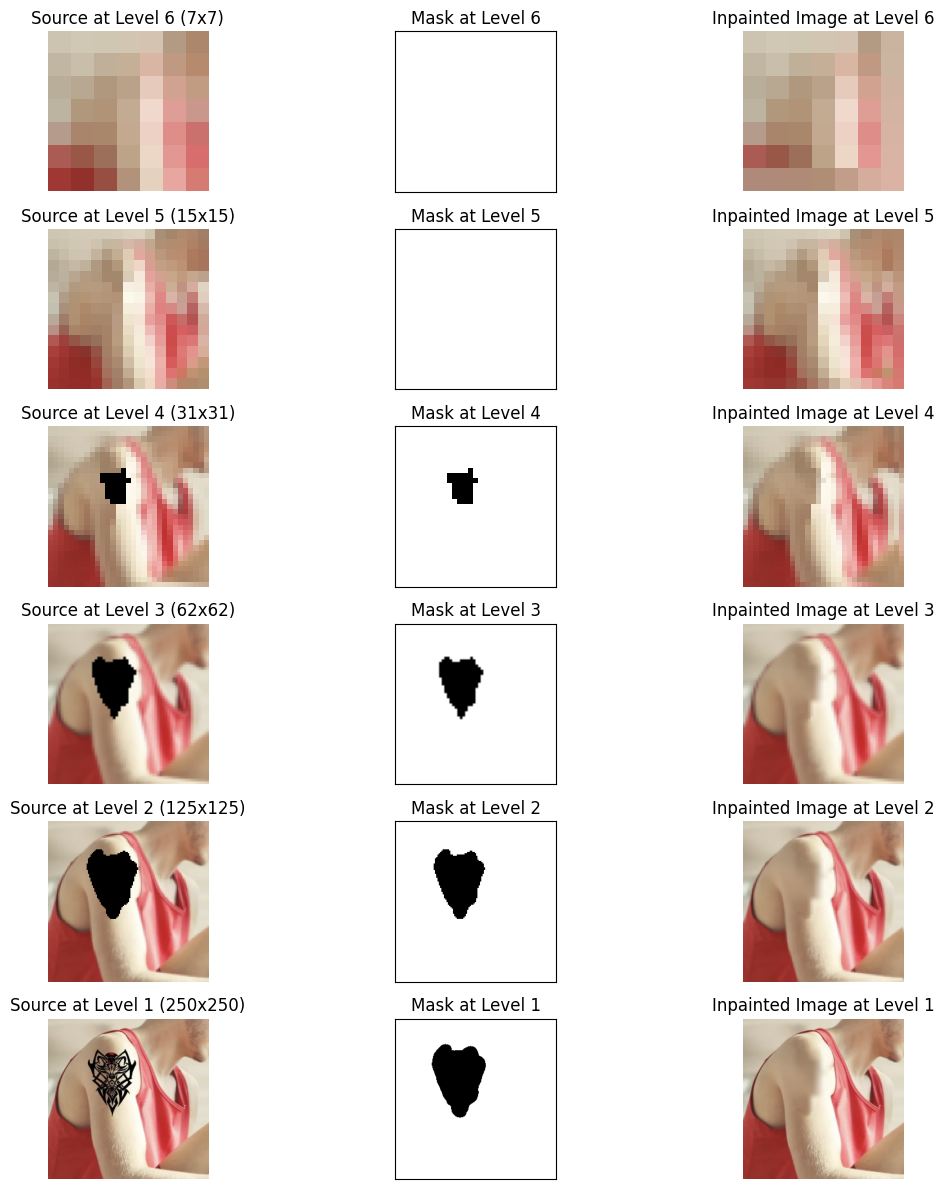

In [30]:
plot_images_level_wise(inpainted_images3, sources3, masks3)

In [35]:
src_path = "../images/watermark.png"
mask_path = "../images/watermark_mask.png"
inpainted_images4, sources4, masks4 = test_inpainting(src_path, mask_path)

Level 6 done in 0.02050304412841797 seconds.
Level 5 done in 0.10364127159118652 seconds.
Level 4 done in 1.1685566902160645 seconds.
Level 3 done in 5.600087881088257 seconds.
Level 2 done in 18.85332417488098 seconds.
Level 1 done in 82.40399193763733 seconds.


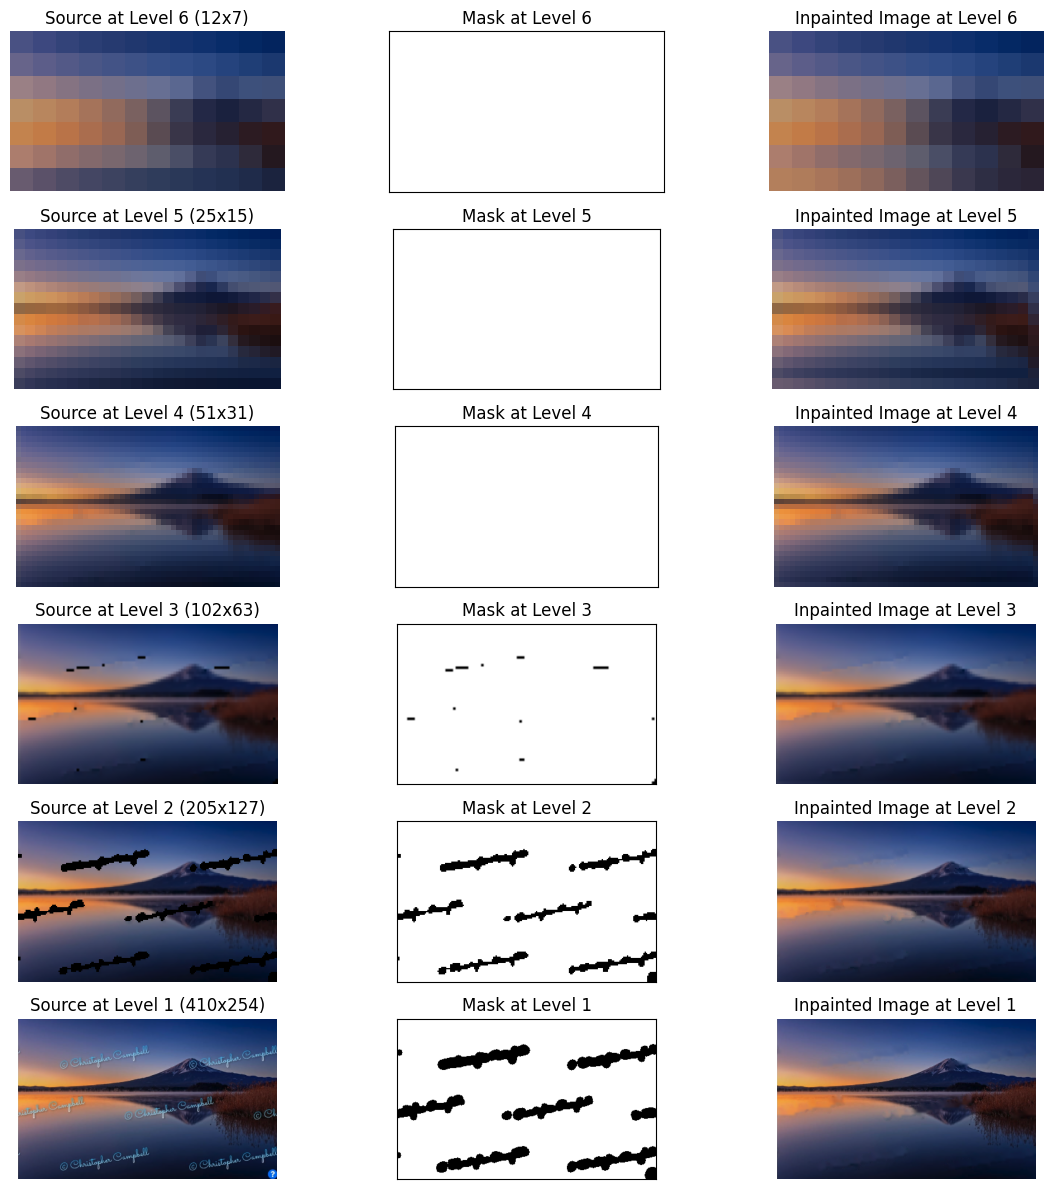

In [36]:
plot_images_level_wise(inpainted_images4, sources4, masks4)

In [ ]:
src_path = "../images/photo_bomb.jpg"
mask_path = "../images/photo_bomb_mask.jpg"
inpainted_images6, sources6, masks6 = test_inpainting(src_path, mask_path)

Level 6 done in 0.011914968490600586 seconds.
Level 5 done in 0.0730891227722168 seconds.
Level 4 done in 0.7375400066375732 seconds.
Level 3 done in 3.4771881103515625 seconds.
Level 2 done in 11.920835018157959 seconds.
Level 1 done in 45.525928020477295 seconds.


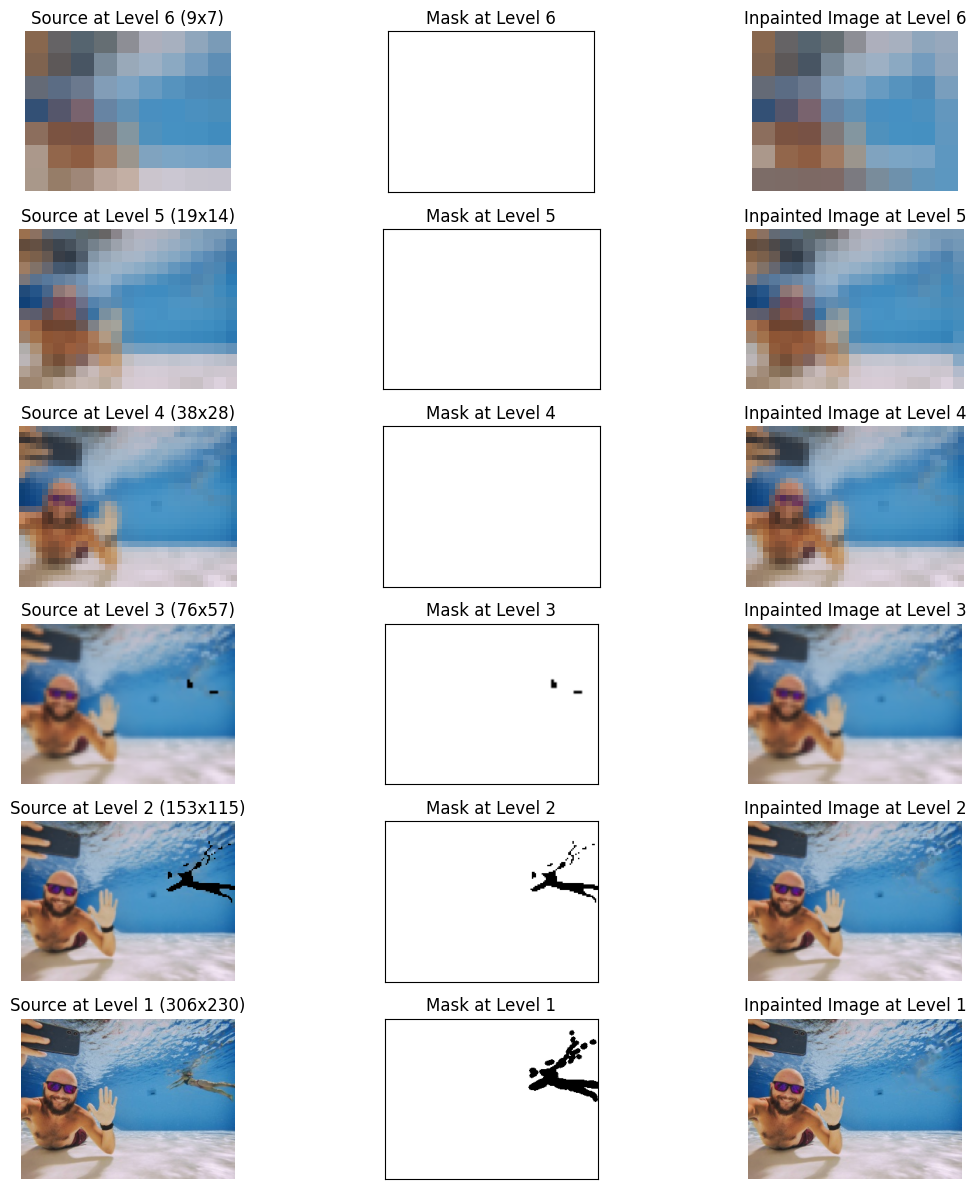

In [44]:
plot_images_level_wise(inpainted_images6, sources6, masks6)